In [102]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
import pandas as pd
from kmeans_plot import plot_decision_boundaries
from sklearn.cluster import KMeans

In [103]:
data16=pd.read_csv("dataset_ejemplo_40_3_16.csv",sep=";")
data16["S"]=pd.Categorical(data16["estado"]).codes
dict(zip( data16['S'], data16['estado'] ))
X16=data16[["e1","e4","e10"]]
Y16=data16[["S"]].to_numpy().ravel()
g1=[0,1,2,3,4,5,6,7,9]
g2=[8]
g3=[10,11,12,13,14]
g4=[15]

In [104]:
Y16.ravel()

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [105]:
pca16 = PCA(n_components=2)
pca16.fit(X16)
pca16.explained_variance_ratio_

array([0.89283633, 0.07773135])

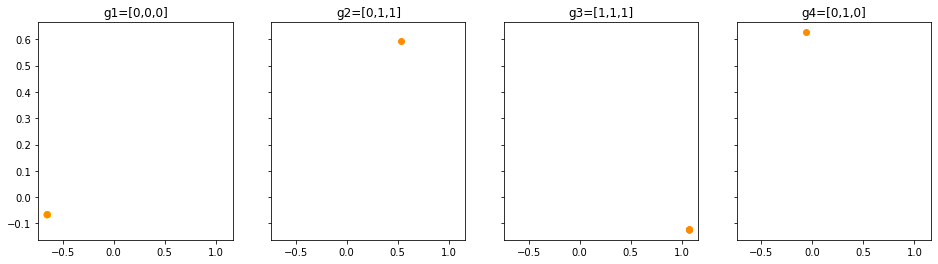

In [106]:
X16_2=pca16.fit_transform(X16)
colors=["darkorange","gold"]
map=matplotlib.colors.ListedColormap(colors)
fig, ax = plt.subplots(1,4,sharex='all',sharey='all')
fig.set_size_inches(16,4)
ax[0].scatter(X16_2[g1,0],X16_2[g1,1],c=Y16[g1],cmap=map);ax[0].set_title("g1=[0,0,0]");
ax[1].scatter(X16_2[g2,0],X16_2[g2,1],c=Y16[g2],cmap=map);ax[1].set_title("g2=[0,1,1]");
ax[2].scatter(X16_2[g3,0],X16_2[g3,1],c=Y16[g3],cmap=map);ax[2].set_title("g3=[1,1,1]");
ax[3].scatter(X16_2[g4,0],X16_2[g4,1],c=Y16[g4],cmap=map);ax[3].set_title("g4=[0,1,0]");


In [107]:
data=pd.read_csv("dataset.csv",sep=";")
resultado=pd.Categorical(data["estado"])
data["S"]=resultado.codes
features=["e"+str(i) for i in range(53)]
X=data[features+["exitosos","fallidos","envios"]]
Y=data[["S"]]
g1=Y.index[Y["S"]==0]
g2=Y.index[Y["S"]==1]
Y=Y.to_numpy().ravel()

In [108]:
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_

array([0.68111085, 0.30228371])

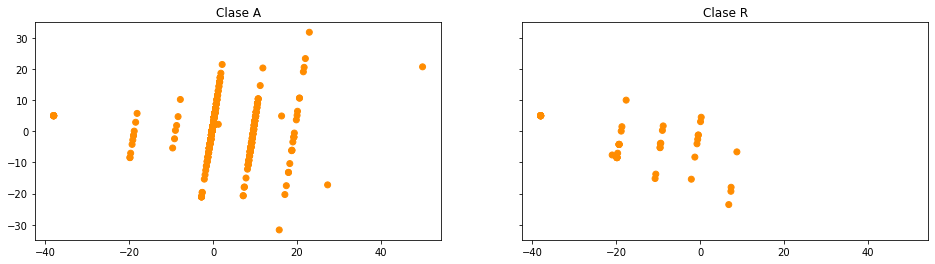

In [109]:
X_2=pca.fit_transform(X)
colors=["darkorange","gold"]
map=matplotlib.colors.ListedColormap(colors)
fig, ax = plt.subplots(1,2,sharex='all',sharey='all')
fig.set_size_inches(16,4)
ax[0].scatter(X_2[g1,0],X_2[g1,1],c=Y[g1],cmap=map)
ax[0].set_title("Clase A");
ax[1].scatter(X_2[g2,0],X_2[g2,1],c=Y[g2],cmap=map);
ax[1].set_title("Clase R");

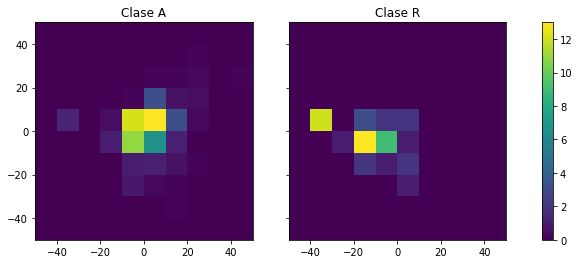

In [110]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(16, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),  
                 axes_pad=0.5,  
                 cbar_mode="single",
                 cbar_location="right",
                 cbar_pad=0.5,
                 share_all=True
                )
xbins=[-50,-40,-30,-20,-10,0,10,20,30,40,50]
ybins=[-50,-40,-30,-20,-10,0,10,20,30,40,50]
counts, xedges, yedges, image = grid[0].hist2d(X_2[g1,0],X_2[g1,1],bins=[xbins,ybins])
grid[0].set_title("Clase A");
counts, xedges, yedges, image = grid[1].hist2d(X_2[g2,0],X_2[g2,1],bins=[xbins,ybins])
grid[1].set_title("Clase R");
fig.colorbar(image, cax=grid.cbar_axes[0], orientation='vertical');

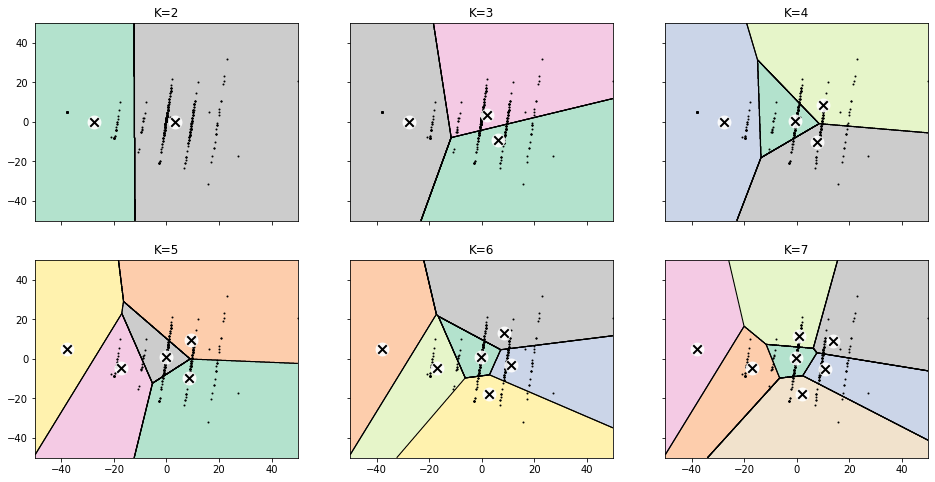

In [111]:
fig, ax = plt.subplots(2,3,sharex='all',sharey='all')
fig.set_size_inches(16,8)
inertias=[]
for pos,clusters in zip([[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]],[2,3,4,5,6,7]):
    kmeans=KMeans(n_clusters=clusters)
    grupos=kmeans.fit_predict(X_2)
    inertias.append(kmeans.inertia_)
    plot_decision_boundaries(kmeans, X_2, ax[pos[0],pos[1]],"K="+str(clusters))

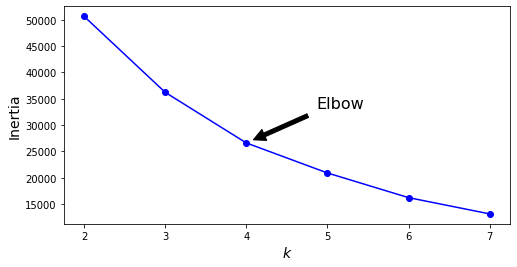

In [112]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 8), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()